# Data Exploration

## Loading data and Overview


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CSdata.txt", sep='\t')
df.head()

/tmp/ipykernel_204/3647059215.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSdata.txt", sep='\t')


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [3]:
df.columns

Index(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX',
       'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL',
       'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE',
       'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE',
       'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEV

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [5]:
# Checking the columns with NA values (%)
round(df.isna().sum()*100/df.shape[0],2)

ID_CLIENT                          0.00
CLERK_TYPE                         0.00
PAYMENT_DAY                        0.00
APPLICATION_SUBMISSION_TYPE        0.00
QUANT_ADDITIONAL_CARDS             0.00
POSTAL_ADDRESS_TYPE                0.00
SEX                                0.00
MARITAL_STATUS                     0.00
QUANT_DEPENDANTS                   0.00
EDUCATION_LEVEL                    0.00
STATE_OF_BIRTH                     0.00
CITY_OF_BIRTH                      0.00
NACIONALITY                        0.00
RESIDENCIAL_STATE                  0.00
RESIDENCIAL_CITY                   0.00
RESIDENCIAL_BOROUGH                0.00
FLAG_RESIDENCIAL_PHONE             0.00
RESIDENCIAL_PHONE_AREA_CODE        0.00
RESIDENCE_TYPE                     2.70
MONTHS_IN_RESIDENCE                7.55
FLAG_MOBILE_PHONE                  0.00
FLAG_EMAIL                         0.00
PERSONAL_MONTHLY_INCOME            0.00
OTHER_INCOMES                      0.00
FLAG_VISA                          0.00


----

## Column 1-10

In [6]:
df['ID_CLIENT'].nunique()  ##all unique, no duplicates

50000

In [7]:
df['CLERK_TYPE'].value_counts()  ##not informed, all C ; can be dropped

C    50000
Name: CLERK_TYPE, dtype: int64

In [8]:
df['PAYMENT_DAY'].value_counts() ##all values make sense

10    20422
15     8750
5      7347
25     7026
20     4694
1      1761
Name: PAYMENT_DAY, dtype: int64

In [9]:
round((df['PAYMENT_DAY'].value_counts()/50000)*100,2)

10    40.84
15    17.50
5     14.69
25    14.05
20     9.39
1      3.52
Name: PAYMENT_DAY, dtype: float64

In [10]:
round((df['APPLICATION_SUBMISSION_TYPE'].value_counts()/50000)*100,2) #imbalance; a lot of null values

Web      56.41
0        38.92
Carga     4.67
Name: APPLICATION_SUBMISSION_TYPE, dtype: float64

In [11]:
round((df['QUANT_ADDITIONAL_CARDS'].value_counts()/50000)*100,2) ##all 0, can be dropped

0    100.0
Name: QUANT_ADDITIONAL_CARDS, dtype: float64

In [12]:
round((df['POSTAL_ADDRESS_TYPE'].value_counts()/50000)*100,2)  ##encoding not informed  ## imbalance

1    99.35
2     0.65
Name: POSTAL_ADDRESS_TYPE, dtype: float64

In [13]:
round((df['SEX'].value_counts()/50000)*100,2) ##Imbalance; N == ' ' i think?

F    61.61
M    38.26
N     0.10
      0.03
Name: SEX, dtype: float64

In [14]:
round((df['MARITAL_STATUS'].value_counts()/50000)*100,2)  ##encoding not informed, cannot differentiate; imbalance 

2    51.93
1    30.57
4     8.41
6     3.75
5     2.59
3     1.26
7     1.07
0     0.40
Name: MARITAL_STATUS, dtype: float64

In [15]:
round((df['QUANT_DEPENDANTS'].value_counts()/50000)*100,2) #Imbalance; the number of dependants in a family

0     67.31
1     14.01
2     10.73
3      4.93
4      1.72
5      0.73
6      0.28
7      0.13
8      0.07
9      0.03
10     0.03
11     0.01
12     0.01
13     0.01
14     0.01
15     0.00
53     0.00
Name: QUANT_DEPENDANTS, dtype: float64

In [16]:
round((df['EDUCATION_LEVEL'].value_counts()/50000)*100,2) #all 0, can be dropped

0    100.0
Name: EDUCATION_LEVEL, dtype: float64

## Column 11-20

In [17]:
# Unknown as a group? Brazilian states
df['STATE_OF_BIRTH'] = df['STATE_OF_BIRTH'].replace(" ", np.nan).replace("XX", np.nan).str.upper()
len(df['STATE_OF_BIRTH'].unique())

28

In [18]:
df['CITY_OF_BIRTH'] = df['CITY_OF_BIRTH'].str.lower()
len(df['CITY_OF_BIRTH'].unique())

7414

In [19]:
df['NACIONALITY'] = df.NACIONALITY.replace(2,0).replace(1,True).replace(0,False)
df['NACIONALITY'].value_counts()
##Country of birth. Encoding not informed but Brazil is likely to be equal 1.

True     47884
False     2116
Name: NACIONALITY, dtype: int64

In [20]:
df['RESIDENCIAL_CITY'] = df.RESIDENCIAL_CITY.str.lower()
len(df['RESIDENCIAL_CITY'].unique())

2483

In [21]:
df['RESIDENCIAL_BOROUGH'] = df.RESIDENCIAL_BOROUGH.str.lower()
len(df['RESIDENCIAL_BOROUGH'].unique())

11815

In [22]:
df['FLAG_RESIDENCIAL_PHONE'] = df.FLAG_RESIDENCIAL_PHONE.replace("Y",True).replace("N",False)
df.FLAG_RESIDENCIAL_PHONE.value_counts()
##Indicates if the applicant possesses a home phone

True     41809
False     8191
Name: FLAG_RESIDENCIAL_PHONE, dtype: int64

In [23]:
df.RESIDENCIAL_PHONE_AREA_CODE = df.RESIDENCIAL_PHONE_AREA_CODE.replace(" ",np.nan)
len(df['RESIDENCIAL_PHONE_AREA_CODE'].unique())

102

In [24]:
# Residence type: owned, mortgage, rented, parents, family
# figure out what type is 1 convert to binary? 
df.RESIDENCE_TYPE.value_counts(dropna=False)

1.0    41572
2.0     3884
5.0     1983
NaN     1349
0.0      760
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64

False    46223
True      3777
Name: MONTHS_IN_RESIDENCE, dtype: int64


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MONTHS_IN_RESIDENCE', ylabel='Density'>

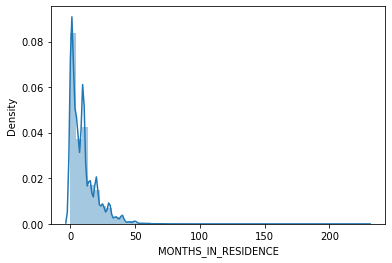

In [25]:
print(df.MONTHS_IN_RESIDENCE.isna().value_counts())
df.MONTHS_IN_RESIDENCE = df.MONTHS_IN_RESIDENCE.fillna(df.MONTHS_IN_RESIDENCE.mean())
sns.distplot(df.MONTHS_IN_RESIDENCE)

## Column 21-30

In [26]:
df.FLAG_MOBILE_PHONE.value_counts()
#count how many applicant have phone number, can be dropped

N    50000
Name: FLAG_MOBILE_PHONE, dtype: int64

In [27]:
df.FLAG_EMAIL.value_counts()
#count how many applicant have email

1    40114
0     9886
Name: FLAG_EMAIL, dtype: int64

In [28]:
df.PERSONAL_MONTHLY_INCOME.describe()

count     50000.000000
mean        886.678437
std        7846.959327
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

In [29]:
df.OTHER_INCOMES.describe()

count     50000.000000
mean         35.434760
std         891.515142
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      194344.000000
Name: OTHER_INCOMES, dtype: float64

In [30]:
df.FLAG_VISA.value_counts()
#to see if the applicant is a visa credit card holder

0    44428
1     5572
Name: FLAG_VISA, dtype: int64

In [31]:
df.FLAG_MASTERCARD.value_counts()
#to see if the applicant is a mastercard credit card holder

0    45127
1     4873
Name: FLAG_MASTERCARD, dtype: int64

In [32]:
df.FLAG_DINERS.value_counts()
#to see if th applicant is a siners credit card holder

0    49934
1       66
Name: FLAG_DINERS, dtype: int64

In [33]:
df.FLAG_AMERICAN_EXPRESS.value_counts()
#to see if the applicant is a american express credit card holder

0    49913
1       87
Name: FLAG_AMERICAN_EXPRESS, dtype: int64

In [34]:
df.FLAG_OTHER_CARDS.value_counts()
#to see if the applicant have other kinds of credit card

0    49898
1      102
Name: FLAG_OTHER_CARDS, dtype: int64

In [35]:
df.QUANT_BANKING_ACCOUNTS.value_counts()
#quantity of banking accounts

0    32122
1    17864
2       14
Name: QUANT_BANKING_ACCOUNTS, dtype: int64

## Column 31-40

In [36]:
df['QUANT_SPECIAL_BANKING_ACCOUNTS'].value_counts()

0    32122
1    17864
2       14
Name: QUANT_SPECIAL_BANKING_ACCOUNTS, dtype: int64

In [37]:
df['PERSONAL_ASSETS_VALUE'].describe().apply(lambda x: '%.5f' % x)

count      50000.00000
mean        2322.37238
std        42357.98440
min            0.00000
25%            0.00000
50%            0.00000
75%            0.00000
max      6000000.00000
Name: PERSONAL_ASSETS_VALUE, dtype: object

In [38]:
df['PERSONAL_ASSETS_VALUE'].value_counts()

0.0         47609
30000.0       222
25000.0       198
50000.0       196
15000.0       185
            ...  
140000.0        1
27000.0         1
18500.0         1
8900.0          1
10500.0         1
Name: PERSONAL_ASSETS_VALUE, Length: 153, dtype: int64

In [39]:
df[df['PERSONAL_ASSETS_VALUE'] > 1]['PERSONAL_ASSETS_VALUE'].describe().apply(lambda x: '%.5f' % x)

count       2390.00000
mean       48585.19582
std       187887.92469
min            5.00000
25%        19000.00000
50%        30000.00000
75%        50000.00000
max      6000000.00000
Name: PERSONAL_ASSETS_VALUE, dtype: object

In [40]:
df['QUANT_CARS'].value_counts()

0    33193
1    16807
Name: QUANT_CARS, dtype: int64

In [41]:
df['COMPANY'].value_counts()

N    27959
Y    22041
Name: COMPANY, dtype: int64

In [42]:
df['PROFESSIONAL_STATE'].value_counts()

      34307
SP     2400
RS     2092
CE     1420
BA     1387
MG     1251
PE      902
PA      710
PR      582
RJ      570
MT      553
RN      492
GO      484
PB      373
MS      352
AL      337
SC      299
DF      271
ES      228
AP      186
MA      184
RO      170
AM      134
PI      100
AC       80
SE       62
TO       58
RR       16
Name: PROFESSIONAL_STATE, dtype: int64

In [43]:
df['PROFESSIONAL_STATE'].value_counts().index

Index([' ', 'SP', 'RS', 'CE', 'BA', 'MG', 'PE', 'PA', 'PR', 'RJ', 'MT', 'RN',
       'GO', 'PB', 'MS', 'AL', 'SC', 'DF', 'ES', 'AP', 'MA', 'RO', 'AM', 'PI',
       'AC', 'SE', 'TO', 'RR'],
      dtype='object')

In [44]:
df['PROFESSIONAL_CITY'].isna().sum()

33783

In [45]:
df['PROFESSIONAL_CITY'].value_counts()

FORTALEZA               419
SAO PAULO               338
                        331
PELOTAS                 324
PORTO ALEGRE            279
                       ... 
SANTIAGO                  1
JUNDIA                    1
SAO JOSE DO  ALEGRE       1
imbe                      1
conselheiro lafaiete      1
Name: PROFESSIONAL_CITY, Length: 2236, dtype: int64

In [46]:
print(df['PROFESSIONAL_CITY'].value_counts().index)

Index(['FORTALEZA', 'SAO PAULO', ' ', 'PELOTAS', 'PORTO ALEGRE', 'Sao Paulo',
       'SALVADOR', 'RECIFE', 'RIO DE JANEIRO', 'NATAL',
       ...
       'SAO FRANCISCO DO GUAPORE', 'SERRA BRANCA', 'Alvta Floresta',
       'Cataguases', 'ILHUES', 'SANTIAGO', 'JUNDIA', 'SAO JOSE DO  ALEGRE',
       'imbe', 'conselheiro lafaiete'],
      dtype='object', length=2236)


In [47]:
df['PROFESSIONAL_BOROUGH'].isna().sum()

33783

In [48]:
df['FLAG_PROFESSIONAL_PHONE'].value_counts()

N    36510
Y    13490
Name: FLAG_PROFESSIONAL_PHONE, dtype: int64

In [49]:
df['PROFESSIONAL_PHONE_AREA_CODE'].value_counts()

       36532
5       1457
54      1109
107      981
97       644
       ...  
55         1
96         1
19         1
37         1
17         1
Name: PROFESSIONAL_PHONE_AREA_CODE, Length: 87, dtype: int64

In [50]:
df['MONTHS_IN_THE_JOB'].value_counts()

0     49924
2        18
1        15
3        12
5         6
4         4
8         2
12        2
18        2
7         2
14        2
6         2
10        1
30        1
9         1
19        1
32        1
27        1
26        1
35        1
15        1
Name: MONTHS_IN_THE_JOB, dtype: int64

## Column 41-53

In [51]:
df.PROFESSION_CODE.value_counts()
# profession code: represent the applicant's profession, no encoding, {0,1,2...18}, integer-valued

9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: PROFESSION_CODE, dtype: int64

In [52]:
df.OCCUPATION_TYPE.value_counts()
# occupation type: represent the applicant's occupation, no encoding, {0,1,2,3,4,5,NULL}

2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
df.MATE_PROFESSION_CODE.value_counts()
# mate profession code: represent the profession of the mate of applicant, no encoding,{0,1,2...17}, integer-valued

0.0     13632
11.0     6005
9.0      1035
16.0      208
2.0       110
12.0       34
10.0       31
6.0        16
13.0       15
7.0        11
8.0         7
15.0        3
17.0        3
14.0        2
5.0         1
1.0         1
3.0         1
4.0         1
Name: MATE_PROFESSION_CODE, dtype: int64

In [54]:
df['EDUCATION_LEVEL.1'].value_counts() 
# education level of the applicant

0.0    15995
3.0      621
4.0      615
2.0      342
1.0       56
5.0       33
Name: EDUCATION_LEVEL.1, dtype: int64

In [55]:
df.FLAG_HOME_ADDRESS_DOCUMENT.value_counts()
# check the documental confirmation of the applicant's home address, all 0, can be dropped

0    50000
Name: FLAG_HOME_ADDRESS_DOCUMENT, dtype: int64

In [56]:
df.FLAG_RG.value_counts()
# check the documental confirmation of the applicant's citizen card number, all 0, can be dropped

0    50000
Name: FLAG_RG, dtype: int64

In [57]:
df.FLAG_CPF.value_counts()
# check the documental confirmation of the applicant's tax payer status, all 0, can be dropped

0    50000
Name: FLAG_CPF, dtype: int64

In [58]:
df.FLAG_INCOME_PROOF.value_counts()
# check the documental confirmation of the applicant's income, all 0, can be dropped

0    50000
Name: FLAG_INCOME_PROOF, dtype: int64

In [59]:
df.PRODUCT.value_counts()
# product: type of credit product applied.  3 classes: {1,2,7}

1    42690
2     6015
7     1295
Name: PRODUCT, dtype: int64

In [60]:
df.FLAG_ACSP_RECORD.value_counts()
# check whether the applicant has any previous credit delinquency  {Y,N},  all N, can be dropped

N    50000
Name: FLAG_ACSP_RECORD, dtype: int64

In [61]:
df.AGE.describe()
# age of the applicant, [6,106]

count    50000.00000
mean        43.24852
std         14.98905
min          6.00000
25%         31.00000
50%         41.00000
75%         53.00000
max        106.00000
Name: AGE, dtype: float64

In [62]:
df.RESIDENCIAL_ZIP_3.value_counts()
# three most significant digits of the actual home zip code

960    721
591    547
570    508
628    459
456    444
      ... 
470      1
430      1
675      1
991      1
802      1
Name: RESIDENCIAL_ZIP_3, Length: 1481, dtype: int64

In [63]:
df.PROFESSIONAL_ZIP_3.value_counts()
# three most significant digits of the actual job zip code

960    721
591    547
570    508
628    459
456    444
      ... 
470      1
430      1
675      1
991      1
802      1
Name: PROFESSIONAL_ZIP_3, Length: 1481, dtype: int64

In [64]:
all(df.PROFESSIONAL_ZIP_3 == df.RESIDENCIAL_ZIP_3)  
# the professional zip and residencial zip are found to be the same, can drop one of them

True

In [65]:
target = df[df.columns[-1]]
target.value_counts()
# target label: whether an applicant is classified as BAD(1) or GOOD(0)

0    36959
1    13041
Name: TARGET_LABEL_BAD=1, dtype: int64

----

# Data Pre-Processing

## Installing Requirements

In [ ]:
!pip install -U threadpoolctl 3.1.0
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
#re-assigning the dataset variable for a clean start
dataset = pd.read_csv("CSdata.txt", sep='\t')
dataset.head()

## Drop Columns

In [ ]:
dropped_columns=['ID_CLIENT', 'CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 
                 'CITY_OF_BIRTH', 'FLAG_MOBILE_PHONE', 'PERSONAL_ASSETS_VALUE',
                 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY','PROFESSIONAL_BOROUGH',
                 'PROFESSIONAL_PHONE_AREA_CODE','MONTHS_IN_THE_JOB','MATE_PROFESSION_CODE',
                 'EDUCATION_LEVEL','FLAG_HOME_ADDRESS_DOCUMENT','FLAG_RG','FLAG_CPF',
                 'FLAG_INCOME_PROOF','FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3','EDUCATION_LEVEL.1']
dataset=dataset.drop(dropped_columns, axis=1)

## Converting Column Type

In [ ]:
dataset["PROFESSIONAL_ZIP_3"] =  pd.to_numeric(dataset['PROFESSIONAL_ZIP_3'],errors='coerce')

## Pre-Processing Columns

In [ ]:
#replacing 0 to Null
dataset['APPLICATION_SUBMISSION_TYPE'] = dataset['APPLICATION_SUBMISSION_TYPE'].replace('0', np.nan)
dataset['RESIDENCE_TYPE'] = dataset['RESIDENCE_TYPE'].replace(0.0, np.nan)
dataset['PERSONAL_MONTHLY_INCOME'] = dataset['PERSONAL_MONTHLY_INCOME'].replace('0.0', np.nan)
dataset['PROFESSION_CODE'] = dataset['PROFESSION_CODE'].replace('0.0', np.nan)
dataset['OCCUPATION_TYPE'] = dataset['OCCUPATION_TYPE'].replace('0.0', np.nan)

#converting to Null
dataset["RESIDENCE_TYPE"] = dataset['RESIDENCE_TYPE'].replace('nan', np.nan)
dataset['SEX'] = dataset['SEX'].replace('N', 'M')
dataset['SEX'] = dataset['SEX'].replace(' ', np.nan)
dataset['RESIDENCIAL_PHONE_AREA_CODE'] = dataset['RESIDENCIAL_PHONE_AREA_CODE'].replace(' ', np.nan)

## Processing Null Columns
checking the proportion of NULL values in columns

In [ ]:
dataset.isna().sum()

In [ ]:
columns_with_nulls = ['RESIDENCIAL_PHONE_AREA_CODE','APPLICATION_SUBMISSION_TYPE','RESIDENCIAL_CITY','RESIDENCE_TYPE','MONTHS_IN_RESIDENCE','PROFESSION_CODE','OCCUPATION_TYPE']

#checking the proportion of null values in columnS
for each_col in columns_with_nulls:
  percentage = round((dataset[each_col].isna().sum())/len(dataset)*100,2)
  print(each_col+" : "+ str(percentage))

## Imputation

In [ ]:
dataset.columns

In [ ]:
nominal_columns=["APPLICATION_SUBMISSION_TYPE","RESIDENCIAL_CITY","RESIDENCIAL_PHONE_AREA_CODE","RESIDENCE_TYPE","PROFESSION_CODE","OCCUPATION_TYPE","SEX"]
for each_col in nominal_columns:
  dataset[each_col] = dataset[each_col].fillna(dataset[each_col].mode()[0])

In [ ]:
nonnumeric_cols=['PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'POSTAL_ADDRESS_TYPE',
       'SEX', 'MARITAL_STATUS','STATE_OF_BIRTH',
       'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE',
       'FLAG_EMAIL', 'FLAG_VISA','FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'COMPANY','FLAG_PROFESSIONAL_PHONE', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
     'PRODUCT','PROFESSIONAL_ZIP_3','TARGET_LABEL_BAD=1']

numeric_cols=['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'AGE']

In [ ]:
numerical_columns = dataset[numeric_cols]
nonnumeric_columns = dataset[nonnumeric_cols]
numerical_columns.head()

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
result = imputer.fit_transform(numerical_columns)
imputed_df = pd.DataFrame(result, columns=numerical_columns.columns)
imputed_df.head()

In [ ]:
dataset = pd.concat([imputed_df,nonnumeric_columns], axis=1)

In [ ]:
dataset.info()

## Encoding

In [ ]:
categorical_cols=['APPLICATION_SUBMISSION_TYPE','SEX','FLAG_RESIDENCIAL_PHONE','COMPANY','FLAG_PROFESSIONAL_PHONE', 'NACIONALITY','POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'RESIDENCE_TYPE', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT']
for each_col in categorical_cols:
  val = dataset[each_col]
  temp = pd.get_dummies(val, prefix=each_col, drop_first=True)
  dataset = pd.concat([dataset,temp], axis=1)
dataset.head()

In [ ]:
dataset=dataset.drop(categorical_cols, axis=1)
dataset.shape[1]

In [ ]:
locations = ['STATE_OF_BIRTH','RESIDENCIAL_BOROUGH','RESIDENCIAL_CITY', 'RESIDENCIAL_STATE','PROFESSIONAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE']
for each_col in locations:
  temp = dataset[each_col].nunique()
  print(each_col+" has "+ str(temp)+" values")
  percentage = round((temp/dataset.shape[0])*100,2)
  print(percentage)

In [ ]:
dataset=dataset.drop(locations, axis=1)
dataset.shape[1]

In [ ]:
dataset.info()

## Outlier Detection

In [ ]:
features = list(dataset.columns)
features.remove("TARGET_LABEL_BAD=1")
features = dataset[features]
target = dataset[["TARGET_LABEL_BAD=1"]]

In [ ]:
loc= LocalOutlierFactor(n_neighbors = 20, contamination = 0.2)
outliers_loc = loc.fit_predict(features)
features['outlier_lof'] = pd.DataFrame(outliers_loc)
len(features[features['outlier_lof']==1])

In [ ]:
dataset = pd.concat([features,target], axis=1)

In [ ]:
no_outlier = dataset[dataset['outlier_lof']==1]
no_outlier = no_outlier.drop('outlier_lof', axis=1)

In [ ]:
no_outlier.shape[0]

In [ ]:
no_outlier.to_csv('cleanedV06.csv', index=False)

# Model Development

In [ ]:
!pip install imblearn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data set
dataset = pd.read_csv('cleanedV06.csv')


list1 = list(dataset.columns)
len(list1)
list1.remove('TARGET_LABEL_BAD=1')
len(list1)


X = dataset[list1]
y = dataset['TARGET_LABEL_BAD=1']

In [ ]:
scaling_needed = ['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'AGE']
no_scaling = list(set(list(X.columns)).difference(scaling_needed))

X_scaling_needed = X[scaling_needed]
X_no_scaling = X[no_scaling]

scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(X_scaling_needed) 

X_new = np.concatenate([scaled_columns, X_no_scaling], axis=1)

X_column_names = list(X_scaling_needed.columns) + list(X_no_scaling.columns)

----

In [ ]:
class Predictors:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def get_pipeline(self, chosen_base_classifier, random_seed):
        pipeline = imbpipeline(steps = [['smote', SMOTE(sampling_strategy=1, n_jobs=-1, random_state=random_seed)],
                                        ['classifier', chosen_base_classifier]]) 
        return pipeline

    def get_stratified_kfold(self, random_seed):
        stratified_kfold = StratifiedKFold(n_splits=5,
                                            shuffle=True,
                                            random_state=random_seed)
        return stratified_kfold


    def train_classifier(self, classifier, grid_space, random_seed):

        pipeline = self.get_pipeline(classifier, random_seed)

        search = RandomizedSearchCV(pipeline, grid_space, scoring='roc_auc', cv=self.get_stratified_kfold(random_seed), refit=True, n_iter=20, n_jobs=-1, random_state=random_seed)

        search.fit(self.X_train, self.y_train)
        print('Best Hyperparameters: %s' % search.best_params_, '\n')

        best_classifier = search.best_estimator_
        y_pred = best_classifier.predict(self.X_test)

        print(f'Best estimator ACCURACY score: {accuracy_score(self.y_test, y_pred)}\nBest estimator AUROC score: {roc_auc_score(self.y_test, y_pred)}')

        tn, fp, fn, tp = confusion_matrix(self.y_test, y_pred).ravel()
        print('Best estimator Type I error: ', (fn/(tp+fn))) # low is good
        print('Best estimator Type II error: ', (fp/(fp+tn))) # low is good
        print('Best estimator PRECISION using confusion matrix error: ', (tp / (tp + fp))) # high is good
        print('Best estimator RECALL using confusion matrix error: ', (tp / (tp + fn))) # high is good

        plot_confusion_matrix(best_classifier, self.X_test, self.y_test)

        return search, best_classifier

    ####### Base learner algorithms #######

    def run_logistic_regression(self, random_seed):
        logistic_regression_classifier = LogisticRegression(solver = 'liblinear', random_state=random_seed)
        
        grid_space = {'classifier__C': np.logspace(-10, 10, 20)}

        search, best_classifier = self.train_classifier(logistic_regression_classifier, grid_space, random_seed)

        return search, best_classifier
        

    def run_decision_tree(self, random_seed):
        decision_tree_classifier = DecisionTreeClassifier(random_state=random_seed)
        
        grid_space = {'classifier__criterion': ['gini', 'entropy'],
                    'classifier__max_depth': np.linspace(2, 100, num=20, dtype=int),
                    'classifier__min_samples_leaf': np.linspace(2, 100, num=20, dtype=int)}

        search, best_classifier = self.train_classifier(decision_tree_classifier, grid_space, random_seed)

        return search, best_classifier

    ####### Bagging algorithms #######

    def run_Bagging(self, base_learner, random_seed):
        bagging_classifier =  BaggingClassifier(base_estimator=base_learner, random_state=random_seed)
        
        grid_space = {'classifier__n_estimators': np.linspace(2, 120, num=20, dtype=int),
                    'classifier__bootstrap_features': [True, False],
                    'classifier__max_samples' : [0.2, 0.4, 0.6, 0.8, 1.0],
                    'classifier__max_features' : [0.2, 0.4, 0.6, 0.8, 1.0]}

        search, best_classifier = self.train_classifier(bagging_classifier, grid_space, random_seed)

        return search, best_classifier

    def run_RandomForest(self, random_seed):
        random_forest_classifier =  RandomForestClassifier(random_state=random_seed)
        
        grid_space = {'classifier__n_estimators': np.linspace(2, 30, num=20, dtype=int),
                    'classifier__criterion': ['gini', 'entropy'],
                    'classifier__max_depth': np.linspace(2, 100, num=20, dtype=int), 
                    'classifier__min_samples_leaf': np.linspace(2, 100, num=20, dtype=int)} 

        search, best_classifier = self.train_classifier(random_forest_classifier, grid_space, random_seed)

        return search, best_classifier
    
    ####### Boosting algorithm #######

    def run_AdaBoost(self, base_learner, random_seed):
        bagging_classifier =  AdaBoostClassifier(base_estimator=base_learner, random_state=random_seed)
        
        grid_space = {'classifier__n_estimators': np.linspace(2, 100, num=20, dtype=int),
                    'classifier__learning_rate' : [0.00001, 0.0001, 0.001, 0.01]}

        search, best_classifier = self.train_classifier(bagging_classifier, grid_space, random_seed)

        return search, best_classifier
    

----

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X_new, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
predictions = Predictors(train_data, test_data, train_labels, test_labels)

----

In [ ]:
lr_search, lr_best_model = predictions.run_logistic_regression(42)

In [ ]:
lr_search_bagging, lr_best_model_bagging = predictions.run_Bagging(lr_best_model['classifier'], 42)

In [ ]:
lr_search_boosting, lr_best_model_boosting = predictions.run_AdaBoost(lr_best_model['classifier'], 42)

---

In [ ]:
dt_search, dt_best_model  = predictions.run_decision_tree(42)

In [ ]:
rf_search, rf_best_model = predictions.run_RandomForest(42)

In [ ]:
# Adapted from
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

forrest = rf_best_model['classifier'].fit(train_data, train_labels)

importances = forrest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forrest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_column_names)

fig, ax = plt.subplots(figsize=(20,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity (MDI)", fontsize=16)
ax.set_ylabel("Mean decrease in impurity", fontsize=12)
fig.tight_layout()

In [ ]:
forest_importances

In [ ]:
dt_boost_search, dt_boost_best_model = predictions.run_AdaBoost(dt_best_model['classifier'], 42)